#Autoencoder model for user rating predictions with Pytorch
Although traditional models for predictions including knn algorithms or factorization methods such as PCA or SVD have proven to be every effective in predicting user data, deep learning has been also applied for many recommendation engines. In the following notebook, we will see how we can use customized autoencoders for user rating predictions

In [1]:
#mount driver with data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Get latest version of pandas

In [2]:
!pip install seaborn==0.9.0
!pip install pandas==0.23.4

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import math
#only read first 10M data. Otherwise, computer cannot handle the datasize
rating = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/aniRec/data/animelists_cleaned.csv",usecols = [0, 1, 5], names = ['username', 'animeID', 'rating'], engine = 'python', nrows=10000000)

In [0]:
#pivot table to obtain user_rating matrix
rating = rating.pivot(index='username',columns='animeID',values='rating')

In [5]:
rating

animeID,1,100,1000,1001,10012,10014,10015,10017,1002,10020,10029,10030,10033,10045,10048,10049,1005,10050,10067,10073,10075,10076,10079,1008,10080,10083,10087,10092,10098,101,10109,1011,10110,10114,10116,10119,1012,1013,1014,1015,...,9865,987,9875,9883,9884,9890,9893,99,990,9904,9905,9907,9911,9917,9919,992,9922,9926,9930,9934,9935,9936,9938,9940,9941,9943,9958,996,9969,997,9970,9979,998,9981,9982,9988,9989,9996,9999,anime_id
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
----phoebelyn,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--FallenAngel--,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,9,NaN,NaN,9,NaN,8,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,8,...,NaN,NaN,NaN,NaN,NaN,9,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,0,NaN,0,NaN,NaN,NaN,NaN,8,NaN,10,NaN,NaN,NaN
--Vaultkai101--,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN
-Ackerman,10,NaN,NaN,NaN,8,NaN,6,NaN,NaN,7,8,10,7,NaN,NaN,7,NaN,NaN,7,6,7,6,7,NaN,10,7,10,NaN,NaN,7,NaN,NaN,7,NaN,NaN,8,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,7,NaN,NaN,NaN,10,NaN,6,NaN,7,7,7,NaN,10,NaN,7,NaN
-Adamu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Alicia-San-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-Anderty-,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN
-Anna-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,8,10,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,8,NaN
-Araragi-,9,NaN,NaN,NaN,0,NaN,NaN,NaN,0,8,9,9,NaN,NaN,NaN,NaN,NaN,7,9,NaN,NaN,NaN,7,NaN,8,NaN,8,8,NaN,8,NaN,NaN,8,NaN,NaN,8,NaN,0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,8,NaN,NaN,NaN,8,NaN,NaN,7,8,NaN,9,NaN,8,NaN,10,NaN,NaN,NaN,0,0,7,0,10,NaN,NaN,NaN


0 or NaN values indicate that the user has not rated the anime (0 indicates, they were on their list, but did not rate them). Let's fill NaN with 0 for consistancy

In [0]:
rating = rating.fillna(0)

In [0]:
rating = rating.drop(columns=['anime_id'])

In [8]:
rating

animeID,1,100,1000,1001,10012,10014,10015,10017,1002,10020,10029,10030,10033,10045,10048,10049,1005,10050,10067,10073,10075,10076,10079,1008,10080,10083,10087,10092,10098,101,10109,1011,10110,10114,10116,10119,1012,1013,1014,1015,...,9863,9865,987,9875,9883,9884,9890,9893,99,990,9904,9905,9907,9911,9917,9919,992,9922,9926,9930,9934,9935,9936,9938,9940,9941,9943,9958,996,9969,997,9970,9979,998,9981,9982,9988,9989,9996,9999
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
----phoebelyn,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
--FallenAngel--,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,9,0,0,9,0,8,0,0,8,0,0,0,0,0,0,8,...,0,0,0,0,0,0,9,0,8,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,8,0,10,0,0
--Vaultkai101--,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,8,0,0,0,0,0,0,0,8,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
-Ackerman,10,0,0,0,8,0,6,0,0,7,8,10,7,0,0,7,0,0,7,6,7,6,7,0,10,7,10,0,0,7,0,0,7,0,0,8,0,0,0,7,...,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,7,0,0,7,0,0,0,10,0,6,0,7,7,7,0,10,0,7
-Adamu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
-Alicia-San-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
-Anderty-,10,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0
-Anna-,0,0,0,0,0,0,0,0,0,6,8,10,0,0,0,0,0,0,7,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,9,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,9,0,8
-Araragi-,9,0,0,0,0,0,0,0,0,8,9,9,0,0,0,0,0,7,9,0,0,0,7,0,8,0,8,8,0,8,0,0,8,0,0,8,0,0,0,0,...,9,0,0,0,0,0,8,0,0,0,0,0,8,0,0,8,0,0,0,8,0,0,7,8,0,9,0,8,0,10,0,0,0,0,0,7,0,10,0,0


Also since the data we were using provide ratings as strings, let's cast them to integers

In [0]:
rating = rating.values.astype(np.uint8)

In [10]:
rating

array([[ 0,  0,  0, ...,  0,  0,  0],
       [10,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ..., 10,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [0]:
from sklearn.model_selection import train_test_split
#split train test data
n_users = rating.shape[0]
n_animes = rating.shape[1]
X_train, X_test, y_train, y_test = train_test_split(rating, rating, test_size=0.2, random_state=42)

In [12]:
!pip3 install torchvision

In [0]:
#import pytorch libraries
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.parallel

#create a dataset object and dataloader
class DS(Dataset):
    def __init__(self,dataset):
        self.label = dataset
        self.input = dataset
        self.len = dataset.shape[0]
    def __getitem__(self,index):
        return self.label[index], self.input[index]
    def __len__(self):
        return self.len
validation_set = DS(X_test)
training_set = DS(X_train)
train_loader = DataLoader(dataset=training_set,batch_size=64,shuffle=True,num_workers=0)
validation_loader = DataLoader(dataset=validation_set,batch_size=64,shuffle=True,num_workers=0)

In [14]:
#make sure we are using cuda for training on GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder,self).__init__()
        self.fc1 = nn.Linear(n_animes,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.fc4 = nn.Linear(64,32)
        self.fc5 = nn.Linear(32,16)
        self.fc6 = nn.Linear(16,32)
        self.fc7 = nn.Linear(32,64)
        self.fc8 = nn.Linear(64,128)
        self.fc9 = nn.Linear(128,256)
        self.fc10 = nn.Linear(256,n_animes)
        self.activation = nn.ReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self,x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        x = self.activation(self.fc4(x))
        x = self.activation(self.fc5(x))
        x = self.activation(self.fc6(x))
        x = self.activation(self.fc7(x))
        x = self.activation(self.fc8(x))
        x = self.activation(self.fc9(x))
        x = self.fc10(x)
        return x
autoencoder = AutoEncoder()
autoencoder.to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(),lr=0.0001)

In [16]:
epoch = 100
history = {'train':[],'valid':[]}
for epoch in range(0,epoch):
    train_loss = 0.
    train_num = 0.
    for i, data in enumerate(train_loader):
        inputs, labels = data
        inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
        inputs = inputs.float()
        labels = inputs.float()
        #make sure we are not getting an all-zero data
        if torch.sum(labels.data>0)>0:
          output = autoencoder(inputs)
          labels.require_grad = False
          #set everything to 0 except non_zero labels. We are only evaluating on items that user has given a rating
          output[labels==0] = 0
          optimizer.zero_grad()
          #make sure that we are dividing by the number of items that user has rated
          scaler = labels.shape[0]*labels.shape[1]/torch.nonzero(labels).shape[0]
          loss = criterion(output,labels)
          loss.backward()
          train_num+=1.
          #take sqrt for RMSE measure
          train_loss += np.sqrt(loss.data[0]*scaler)
          optimizer.step()
    #use no grad to save computation for validation
    with torch.no_grad():
        validation_loss = 0.
        valid_num = 0.
        for i, data in enumerate(validation_loader):
          inputs, labels = data
          inputs, labels = Variable(inputs).to(device), Variable(labels).to(device)
          inputs = inputs.float()
          labels = inputs.float()
          if torch.sum(labels.data>0)>0:
            output = autoencoder(inputs)
            output[labels==0] = 0
            scaler = labels.shape[0]*labels.shape[1]/torch.nonzero(labels).shape[0]
            loss = criterion(output,labels)
            validation_loss += np.sqrt(loss.data[0]*scaler)
            valid_num+=1.
    print("epoch: " + str(epoch))
    #divide by num to take everything
    print("train loss: " + str(train_loss/train_num))
    history['train'].append(train_loss/train_num)
    print("validation loss: " + str(validation_loss/valid_num))
    history['valid'].append(validation_loss/valid_num)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


epoch: 0
train loss: tensor(4.8792)
validation loss: tensor(3.0720)
epoch: 1
train loss: tensor(2.5381)
validation loss: tensor(2.2555)
epoch: 2
train loss: tensor(2.0898)
validation loss: tensor(1.9824)
epoch: 3
train loss: tensor(1.8422)
validation loss: tensor(1.7775)
epoch: 4
train loss: tensor(1.6518)
validation loss: tensor(1.6368)
epoch: 5
train loss: tensor(1.5168)
validation loss: tensor(1.5366)
epoch: 6
train loss: tensor(1.4445)
validation loss: tensor(1.5015)
epoch: 7
train loss: tensor(1.4093)
validation loss: tensor(1.4762)
epoch: 8
train loss: tensor(1.3864)
validation loss: tensor(1.4712)
epoch: 9
train loss: tensor(1.3728)
validation loss: tensor(1.4823)
epoch: 10
train loss: tensor(1.3644)
validation loss: tensor(1.4644)
epoch: 11
train loss: tensor(1.3579)
validation loss: tensor(1.4632)
epoch: 12
train loss: tensor(1.3480)
validation loss: tensor(1.4736)
epoch: 13
train loss: tensor(1.3425)
validation loss: tensor(1.4667)
epoch: 14
train loss: tensor(1.3338)
validat

In [0]:
import seaborn as sns
history = pd.DataFrame(history)
history['train'] = history['train'].apply(lambda x: x.numpy())
history['valid'] = history['valid'].apply(lambda x: x.numpy())

Let's visualize the data and evaluate our model

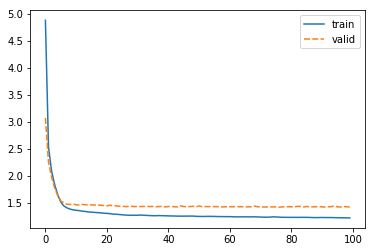

In [18]:
sns.lineplot(data=history)

## Evaludation of our model

Given that our rating scale is from 1~10, our validation loss shows that our model is only more or less 1 star away from real rating which demonstrates great performance. However, the validation loss seems to be staggering so there are still a few rooms for improvement

1. Hyperparmeter optimization: Perhaps changing the learning rate and changing # of nodes and layers
2. Adding dropout and L2 regluariztion: Dropout can be used to improve on validation loss as well as L2 regularization.
3. Adding user/item features: For even more customization, we may even add user/item features in the middle layer